In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

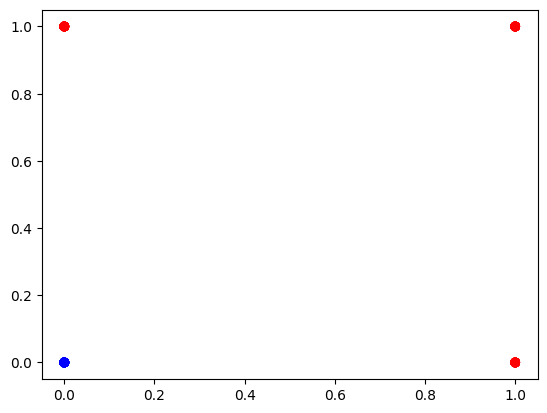

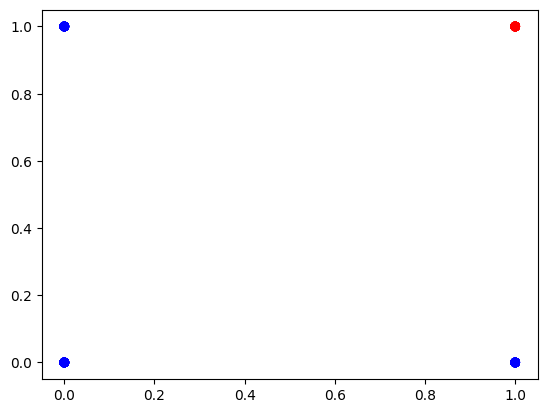

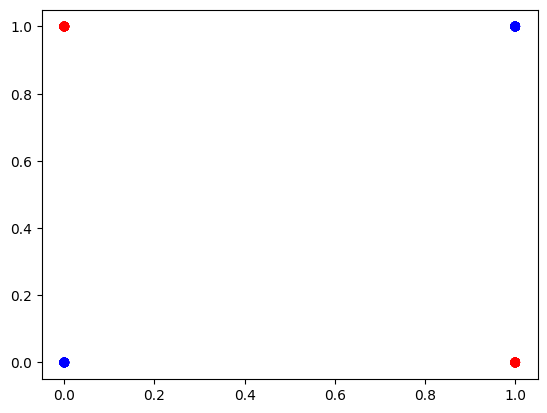

In [4]:
def generate_or_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] | x[:, 1]]).T
    return x, y

def generate_and_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] & x[:, 1]]).T
    return x, y

def generate_xor_data():
    x = np.random.randint(0, 2, size=(100, 2))
    y = np.array([x[:, 0] ^ x[:, 1]]).T
    return x, y

def plot_data(x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap=plt.cm.bwr)
    plt.show()

plot_data(*generate_or_data())
plot_data(*generate_and_data())
plot_data(*generate_xor_data())

# OR

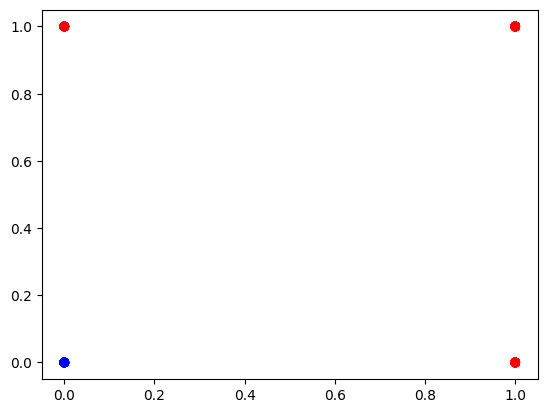

loss: 0.2425, accuracy: 0.7300
loss: 0.1676, accuracy: 0.7300
loss: 0.1382, accuracy: 0.7300
loss: 0.1136, accuracy: 0.7300
loss: 0.0941, accuracy: 1.0000
loss: 0.0793, accuracy: 1.0000
loss: 0.0680, accuracy: 1.0000
loss: 0.0592, accuracy: 1.0000
loss: 0.0521, accuracy: 1.0000
loss: 0.0463, accuracy: 1.0000


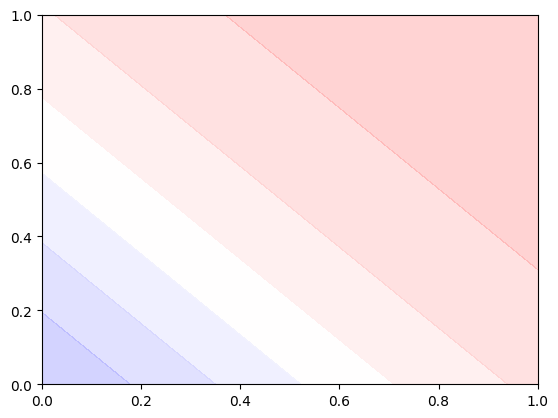

In [111]:
class Model(tf.Module):
    def __init__(self):
        self.w = tf.Variable(tf.random.uniform(shape=[2, 1], minval=-1, maxval=1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-1, maxval=1))

    def __call__(self, x):
        y = tf.sigmoid(tf.matmul(x, self.w) + self.b)
        return y

model = Model()

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    grads = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(lr * grads[0])
    model.b.assign_sub(lr * grads[1])

def predict(x):
    return model(x)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(predict(x)), y), tf.float32))

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

x, y = generate_or_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

# AND

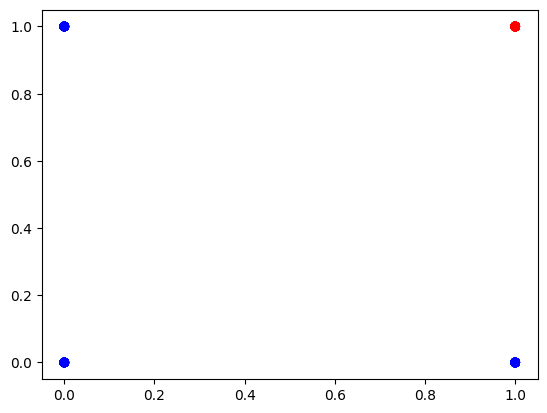

loss: 0.3319, accuracy: 0.2100
loss: 0.2324, accuracy: 0.7200
loss: 0.1837, accuracy: 0.7200
loss: 0.1502, accuracy: 0.7200
loss: 0.1269, accuracy: 1.0000
loss: 0.1100, accuracy: 1.0000
loss: 0.0971, accuracy: 1.0000
loss: 0.0869, accuracy: 1.0000
loss: 0.0786, accuracy: 1.0000
loss: 0.0717, accuracy: 1.0000


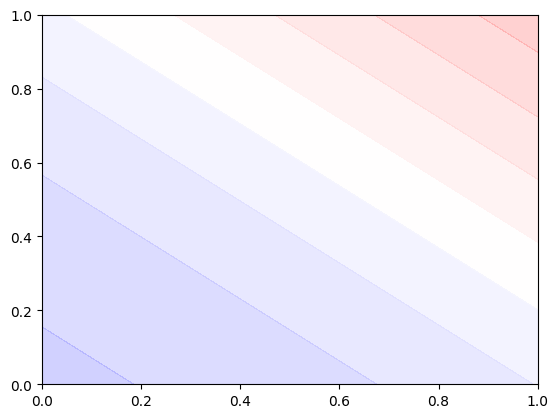

In [112]:
model = Model()

x, y = generate_and_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

# XOR

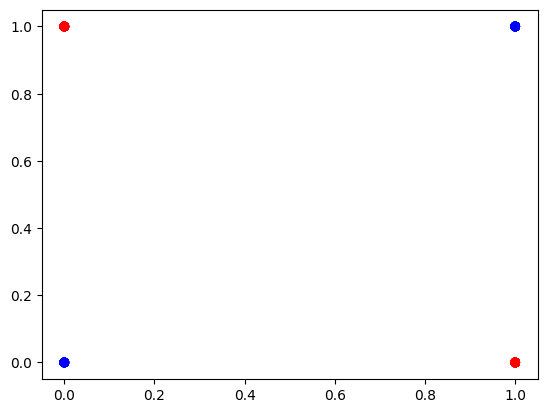

loss: 0.2482, accuracy: 0.5300
loss: 0.1833, accuracy: 0.7600
loss: 0.1822, accuracy: 0.7600
loss: 0.1818, accuracy: 0.7600
loss: 0.1815, accuracy: 0.7600
loss: 0.1813, accuracy: 0.7600
loss: 0.1810, accuracy: 0.7600
loss: 0.1808, accuracy: 0.7600
loss: 0.1806, accuracy: 0.7600
loss: 0.1804, accuracy: 0.7600
[[0.25039527 0.25039637 0.2503978  ... 0.69702023 0.69702053 0.6970208 ]
 [0.25039637 0.2503978  0.25039965 ... 0.69702053 0.6970208  0.69702107]
 [0.2503978  0.25039962 0.25040197 ... 0.6970208  0.69702107 0.6970211 ]
 ...
 [0.6970201  0.6970205  0.6970207  ... 0.6970217  0.6970217  0.6970217 ]
 [0.6970205  0.6970207  0.69702095 ... 0.6970217  0.6970217  0.6970217 ]
 [0.6970207  0.69702095 0.6970211  ... 0.6970217  0.6970217  0.6970217 ]]


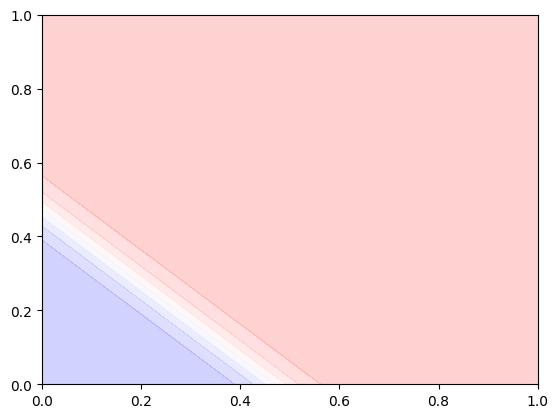

In [8]:
class Layer(tf.Module):
    def __init__(self, out_dim, weight_init=tf.random.uniform, activation=tf.identity):
        self.out_dim = out_dim
        self.weight_init = weight_init
        self.activation = activation
        self.w = None
        self.b = None

    @tf.function
    def __call__(self, x):
        self.in_dim = x.shape[1]
        if self.w is None:
            self.w = tf.Variable(self.weight_init(shape=[self.in_dim, self.out_dim]))
        if self.b is None:
            self.b = tf.Variable(tf.zeros(shape=[self.out_dim]))
        z = tf.add(tf.matmul(x, self.w), self.b)
        return self.activation(z)

class MLP(tf.Module):
    def __init__(self, layers):
        self.layers = layers

    @tf.function
    def __call__(self, x, preds=False): 
        for layer in self.layers:
            x = layer(x)
        return x

model = MLP([
    Layer(2, activation=tf.nn.sigmoid),
    Layer(1, activation=tf.nn.sigmoid)
])

x, y = generate_xor_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(model(x)), y), tf.float32))

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

for i in range(1000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()

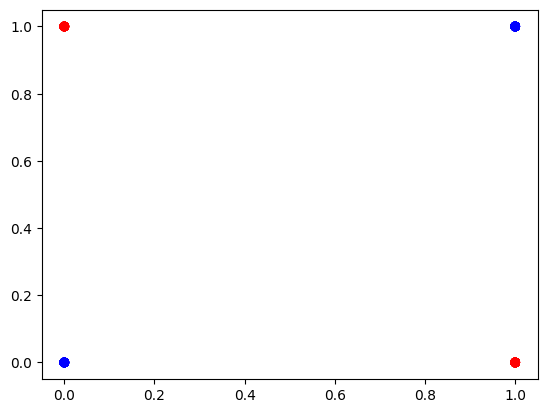

TypeError: in user code:

    File "C:\Users\rmagur1203\AppData\Local\Temp\ipykernel_11976\473585371.py", line 26, in __call__  *
        x = layer(x)

    TypeError: 'ListWrapper' object is not callable


In [15]:
class Layer(tf.Module):
    def __init__(self, out_dim, weight_init=tf.random.uniform, activation=tf.identity):
        self.out_dim = out_dim
        self.weight_init = weight_init
        self.activation = activation
        self.w = None
        self.b = None

    @tf.function
    def __call__(self, x):
        self.in_dim = x.shape[1]
        if self.w is None:
            self.w = tf.Variable(self.weight_init(shape=[self.in_dim, self.out_dim]))
        if self.b is None:
            self.b = tf.Variable(tf.zeros(shape=[self.out_dim]))
        z = tf.add(tf.matmul(x, self.w), self.b)
        return self.activation(z)

class MLP(tf.Module):
    def __init__(self, layers):
        self.layers = layers

    @tf.function
    def __call__(self, x, preds=False): 
        for layer in self.layers:
            x = layer(x)
        return x

model = MLP([
    Layer(2, activation=tf.nn.relu),
    Layer(1, activation=tf.nn.relu),
    Layer(1, activation=tf.nn.relu)
])

x, y = generate_xor_data()

x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

plot_data(x, y)

def accuracy(x, y):
    return tf.reduce_mean(tf.cast(tf.equal(tf.round(model(x)), y), tf.float32))

def loss_fn(x, y):
    return tf.reduce_mean(tf.square(model(x) - y))

def train(x, y, lr=0.1):
    with tf.GradientTape() as tape:
        loss = loss_fn(x, y)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

def train

def plot_decision_boundary():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x = tf.constant(x, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)
    xx, yy = np.meshgrid(x, y)
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.numpy().reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z, cmap=plt.cm.bwr, alpha=0.2)
    plt.show()

for i in range(10000):
    train(x, y)
    if i % 100 == 0:
        print('loss: {:.4f}, accuracy: {:.4f}'.format(loss_fn(x, y), accuracy(x, y)))

plot_decision_boundary()